In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Aug 24 16:35:51 2020

@author: u300737
"""
import os
import sys

import numpy as np
import pandas as pd
import xarray as xr

start_path=os.getcwd()
plot_path=start_path+"/../plots/"
ac3_scripts_path=start_path+"/../scripts/"
my_git_path=start_path+"/../../"
major_work_path=my_git_path+"/../Work/GIT_Repository/"
synth_ar_path=my_git_path+"/Synthetic_Airborne_Arctic_ARs/"
hamp_processing_path=my_git_path+"/hamp_processing_python/"
config_path=synth_ar_path+"config/"
sys.path.insert(1,config_path)
sys.path.insert(2,ac3_scripts_path)
sys.path.insert(3,synth_ar_path+"/src/")
sys.path.insert(4,synth_ar_path+"/plotting/")
sys.path.insert(5,hamp_processing_path)
sys.path.insert(6,hamp_processing_path+"/plotting/")
import data_config
###############################################################################
import flightcampaign
import moisturebudget as Budgets
###############################################################################
#Grid Data
from reanalysis import ERA5,CARRA
from ICON import ICON_NWP as ICON
import gridonhalo as Grid_on_HALO
###############################################################################
#-----------------------------------------------------------------------------#
import warnings
warnings.filterwarnings("ignore")

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [38]:
campaign="HALO_AC3"
ar_of_day="AR_entire_2"
flight=["RF06"]

sector_to_plot="warm"
take_arbitary=True
do_plotting=True

from simplified_flight_leg_handling import simplified_run_grid_main
with HiddenPrints():
    halo_era5,halo_df,cmpgn_cls,ERA5_on_HALO,radar,Dropsondes=\
        simplified_run_grid_main(flight=flight,config_file_path=major_work_path,ar_of_day=ar_of_day)
flight=cmpgn_cls.flight

flight_dates={
    "RF03":"20220313",
    "RF05":"20220315",
    "RF06":"20220316",
    "RF16":"20220410"}
halo_era5.describe()

,Minutesofday,Halo_Lat,Halo_Lon,Closest_Era_Lat,Closest_Era_Lon,Interp_IWV,Interp_E,Interp_Precip,Interp_LWP,Interp_IWP,Interp_IVT,IVT_max_distance
count,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7.620000e+03,7620.000000,7620.000000,7620.000000,7.620000e+03
mean,75.000000,74.544924,15.577739,74.545472,15.578773,9.235360,-0.017722,2.480452e-02,58.443337,33.040626,171.317505,7.182429e+05
std,36.663011,1.073278,6.429578,1.071417,6.429386,1.614180,0.034072,5.539544e-02,56.581858,37.378267,33.767905,5.384690e+05
min,12.000000,72.957418,3.884112,73.000000,4.000000,6.444293,-0.059816,-1.164153e-07,2.318214,0.323420,113.812394,-1.910970e+05
25%,43.000000,73.487017,10.656003,73.500000,10.750000,8.016541,-0.044169,2.952141e-03,9.901555,3.480860,143.585959,2.387628e+05
50%,75.000000,74.564421,15.620234,74.500000,15.500000,8.965206,-0.036721,4.765032e-03,35.620399,13.475061,167.137479,7.154090e+05
75%,107.000000,75.571723,20.579093,75.500000,20.500000,10.570374,0.020939,1.388906e-02,93.638031,58.891767,202.605296,1.202954e+06
max,138.000000,76.217549,27.498926,76.250000,27.500000,12.975699,0.045246,3.065124e-01,210.425747,134.540083,232.890180,1.628350e+06


In [39]:
# ICON File
icon_major_path=cmpgn_cls.campaign_path+"/data/ICON_LEM_2KM/"
hydrometeor_icon_path=cmpgn_cls.campaign_path+"/data/ICON_LEM_2KM/"
print(hydrometeor_icon_path)
icon_resolution=2000 # units m
upsample_time="20min"
date=flight_dates[flight[0]]
interp_icon_hmp_file=flight[0]+"_"+ar_of_day+"_"+"interpolated_HMP.csv"
        
icon_var_list=ICON.lookup_ICON_AR_period_data(cmpgn_cls.name,flight,ar_of_day,
                                                 icon_resolution,
                                                 hydrometeor_icon_path,
                                                 synthetic=False)

ICON_on_HALO=Grid_on_HALO.ICON_on_HALO(
    cmpgn_cls,icon_var_list,halo_df,flight,date,
    interpolated_hmp_file=interp_icon_hmp_file,
    interpolated_hmc_file=None,ar_of_day=ar_of_day,
    upsample_time=upsample_time,
    synthetic_icon=False,
    synthetic_flight=False)

if campaign=="HALO_AC3":
    hydrometeor_icon_path=hydrometeor_icon_path+flight[0]+"/"
ICON_on_HALO.update_ICON_hydrometeor_data_path(hydrometeor_icon_path)

halo_icon_hmp=ICON_on_HALO.load_interpolated_hmp()
#halo_icon_hmp["Interp_Precip"]/=1000
halo_icon_hmp.describe()

C:\Users\u300737\Desktop\PhD_UHH_WIMI\Work\GIT_Repository//HALO_AC3/data/ICON_LEM_2KM/
RF06_AR_entire_2_interpolated_HMP.csv  is already calculated and will be opened


,Minutesofday,Halo_Lat,Halo_Lon,Interp_IWV,Interp_LWP,Interp_IWP,Interp_Precip,Interp_EV
count,7620.000000,7620.000000,7620.000000,7620.000000,7620.000000,7.620000e+03,7.620000e+03,7620.000000
mean,795.000000,74.544924,15.577739,10.117624,39.535474,2.541068e+01,1.347866e-01,-0.003844
std,36.663011,1.073278,6.429578,1.975641,56.699548,3.244490e+01,2.477423e-01,0.010169
min,732.000000,72.957418,3.884112,5.477260,0.000000,-8.243654e-26,-2.499269e-20,-0.023904
25%,763.000000,73.487017,10.656003,8.996875,2.837260,2.153913e-02,0.000000e+00,-0.010829
50%,795.000000,74.564421,15.620234,9.911764,13.298557,6.745899e+00,2.383596e-03,-0.004834
75%,827.000000,75.571723,20.579093,11.857332,48.398088,4.481449e+01,1.680832e-01,0.007338
max,858.000000,76.217549,27.498926,13.326349,310.732756,1.336194e+02,1.394584e+00,0.012267


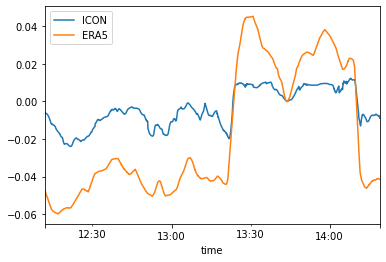

In [40]:
import matplotlib.pyplot as plt
halo_icon_hmp["Interp_EV"].plot(label="ICON")
halo_era5["Interp_E"].plot(label="ERA5")
plt.legend()

In [41]:
Evap_Sectors=pd.DataFrame(data=np.nan,columns=["mean","std"],index=["S1","S2","S3","S4"])
mean_values=[0.002438,0.00275,-0.015,-0.0038]
std_values=[0.006509,0.005,0.0083,0.0101]
Evap_Sectors["mean"]=mean_values
Evap_Sectors["std"]=std_values

SyntaxError: unexpected EOF while parsing (<ipython-input-41-4fabfd04222b>, line 4)